# A) Very easy intro for data scientists with no clue of geodata but wish for a map.

**About geodata**

there's a lot of theory behind geodata (whole university programms like geodesy etc) because basically
- some bright spot found out, that the earth is round    =======> (3D-) globe with a geogr. coordinate system   (issue #1: latitude and longitude)
- some seafaring brothers wanted to use that knowledge  ====> flat (2D-) map with coordinate grid           (issue #2: projection)
- some researchers obsessed over accuracy   ==============> not a globe but an ellipsoid                  (issue #3: epsg and transformations)
- now satellites are of the opinion, that the earth is a potato ====> or a geoide ... well, anyway..           (i hesitate to even - hm ... 

... we'll talk about that along the way in easily digestible portions.

**And how to deal with this mess?**

- geometry dtype, shapes (points, lines, polygones), shp-files. 
- maybe we talk a bit about discrete data: vector, raster, (lidar, point cloud).
- and of course: handling the '#issues'.
                                                                                                              
**On the bright side:**

geodata is the _MOTHER OF MERGABILITY!_ As soon as you know where something is, you can merge everything with everything ON 'location'. That's called the _'SPATIAL JOIN'_.

Imagine you have the 'height above sea level' and rainfall data. You then can calculate drain rates, flooding hazards and ... a lot of things. Or you get a 'layer' with all roads along with your flooding data. Then you can tell, which roads are passable, which will be passable when water level drops by 20 cm ... and so on. (Let's mention here the strange custom to handle data as 'layers'. You can add to e.g. a topographic 'basemap' additional (data-)layers with infrastructure (roads, cities), with socio-economic data (population, employment) or a layer 'orthophoto' etc.)

And of course, there is the advantage of visualisation by _MAPs_.

**So now,**

let's start with a first map!

<img src="img/veeery_easy_map.png" alt="veery easy MAP" width="1500">

# Make a map with folium library
documentation: https://python-visualization.github.io/folium/latest/

**ingredient list**
- folium.Map()
- data with latitude and longitude as float

**output**
- map based on open street map (OSM) = 'basemap'
- with markers for the data = 'layer'
- and heatmap for population layer

## Import library and data

In [1]:
# pip install folium
import pandas as pd
import folium

In [2]:
# load cities data 
# with latitude and longitude as float

cities = pd.read_csv("some_cities_data.csv", index_col=None)
cities.head(2)

,city,latitude,longitude,country,iso2,Bundesland,population
0,Berlin,52.5200,13.405,Germany,DE,Berlin,4473101.0
1,Stuttgart,48.7775,9.180,Germany,DE,Baden-Württemberg,2787724.0


This data gives us Cities with location data and other data values for populations.

From that we will first 
- create a topographic basemap using open street map (OSM)
- then add a data layer with markers for cities
- and then add a data layer with heatmap for population.

**!Vamos!**

.

.

## Create Basemap (OSM)

In [3]:
# create basemap = openstreetmap (OSM)
# with center='Germany' (latitude=51.57, longitude=14.37)

map = folium.Map([51.57, 14.37], zoom_start=6)
map

much too easy, isn't it?

.

.

## Add marker layer: cities

In [4]:
# add data layer to basemap
# with markers for cities

for i, row in cities.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['city']
    ).add_to(map)

In [5]:
map

You just made your first map, congratulations!

.

.

**Change marker symbols to 'CircleMarkers'**

In [6]:
# create basemap OSM
map = folium.Map([51.57, 14.37], zoom_start=6)

# add CircleMarker layer
for i, row in cities.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']], popup=row['city'], radius=5, color='green', fill=True, fill_color='black'
    ).add_to(map)
    
map

## Add heatmap layer: population

In [7]:
from folium.plugins import HeatMap

# prepate heatmap_data
hm_data = []
for i, row in cities.iterrows():
    hm_data.append([row['latitude'], row['longitude'], row['population']])

# add heatmap layer to map
HeatMap(hm_data
    ).add_to(map)
    
map

Well done! You've already created a basemap with two layers :)

.

.

## _Concessions_

_I know i promised more in the introduction, and i intend to continue here with geopandas and geometry format._

_But -sadly- it's time for bed now._

_You've made your first map! So stopp nagging :)_

_Good n8 and CU soon!_

## Summary as send off for the night -haha-

In [8]:
def folium_map(cities):
    import pandas as pd
    import folium
    from folium.plugins import HeatMap

    # create basemap OSM
    map = folium.Map([51.57, 14.37], zoom_start=6)

    # add marker layer 'cities'
    for i, row in cities.iterrows():
        folium.CircleMarker([row['latitude'], row['longitude']], popup=row['city'], radius=1.2, color='indigo'
        ).add_to(map)

    # prepate heatmap_data
    hm_data = []
    for i, row in cities.iterrows():
        hm_data.append([row['latitude'], row['longitude'], row['population']])

    # add heatmap layer 'population'
    HeatMap(hm_data
        ).add_to(map)
    return map

In [9]:
# load data with latitude and lognitude as float
cities = pd.read_csv("some_cities_data.csv", index_col=None)

# call folium_map
folium_map(cities)

In [10]:
map.save('folium_map_cities_population.html')

.

.

.

# B) Hello Back!

Good morning, i hope you had a good nights sleep? I had, so **'on y va'!**

**for today you'll need**
- geopandas library
- the data folder 'some_geo_data_shp'

**outcome**
- know about geodata, geometry format and shape file
- plot a map with polygones
- and two layers
- basic map layout

We start with one of the _#issues_ mentioned at the very beginning:

## About Geodata

We did a nice and easy folium map yesterday. The geodata we used consisted of float values for latitude and longitude. Using these you can locate POINTS - as many as you like. Thats why we made layers with cities (=points) and a density heatmap (also based on point data).

But it does not touch the real strength of geodata. For that we need other elements everyone knows from maps, namely POINTS, LINES and POLYGONES (like for gas stations, roads and parking lots...).

When drawing a line, i need more than one point (latitude-longitude-pairs). As **geodata** a line then looks like:
- LINE(lat1 lon1, lat2 lon2, ..., lat_n lon_n) same goes for polygones:
- POLYGONE (lat1 lon1, lat2 lon2, ..., lat_n lon_n) and of course there are still:
- POINT(lat1 lon1)

They have a specific **data format**, and it's called **'geometry'** (because point, line and polygone are geometric shapes). 

There is a bit more, but first let's have a quick look at a **GeoDataFrame**:

.


## GeoDataFrame and Datetype 'geometry'

In [11]:
import geopandas as gpd

nuts = gpd.read_file("some_geo_data_shp/NUTS_RG_20M_2021_4326.shp")
nuts.head(2)

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,FR,0,FR,France,France,0.0,0,0,FR,"MULTIPOLYGON (((55.21471 -21.03851, 55.27392 -..."
1,HR,0,HR,Hrvatska,Hrvatska,0.0,0,0,HR,"MULTIPOLYGON (((16.59681 46.47590, 16.85476 46..."


First, **NUTS** is the EU's official system of administrative bodies (Nomenclature des Unités territoriales statistiques – NUTS). So we are talking countries (levl_code=0), regions (levl_code=1), 'Bundesländer' (levl_code=1), 'Bezirke' (levl_code=2), Departements etc. Therefore our geometry are (multi)polygones.

What we see above is a GeoDataFrame. It's very similar to a pandas DataFrame, but it **alsways(!) contains the geometry column** at the end. The geometry column is of datatype 'geometry'. See the dtype of the geometry column below:

In [12]:
nuts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NUTS_ID     2010 non-null   object  
 1   LEVL_CODE   2010 non-null   int64   
 2   CNTR_CODE   2010 non-null   object  
 3   NAME_LATN   2010 non-null   object  
 4   NUTS_NAME   2010 non-null   object  
 5   MOUNT_TYPE  2009 non-null   float64 
 6   URBN_TYPE   2010 non-null   int64   
 7   COAST_TYPE  2010 non-null   int64   
 8   FID         2010 non-null   object  
 9   geometry    2010 non-null   geometry
dtypes: float64(1), geometry(1), int64(3), object(5)
memory usage: 157.2+ KB


Do you recognise the latitude-longitude-pairs below?

In [13]:
nuts["geometry"]

0       MULTIPOLYGON (((55.21471 -21.03851, 55.27392 -...
1       MULTIPOLYGON (((16.59681 46.47590, 16.85476 46...
2       POLYGON ((22.12108 48.37831, 22.15531 48.40340...
3       POLYGON ((19.83100 42.46645, 20.07630 42.55582...
4       POLYGON ((15.75363 48.85218, 16.29009 48.73395...
                              ...                        
2005    POLYGON ((39.85555 37.53101, 40.09329 37.14760...
2006    POLYGON ((41.38055 38.49225, 41.20292 38.31296...
2007    MULTIPOLYGON (((32.34411 80.07982, 31.89018 80...
2008    MULTIPOLYGON (((32.34411 80.07982, 31.89018 80...
2009    POLYGON ((-8.62458 70.94868, -9.01595 70.81093...
Name: geometry, Length: 2010, dtype: geometry

.

## geopandas and matplotlb

Before we go on with the fileformat, let's make a littel map from our NUTS regions, shall we?

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt

<Axes: >

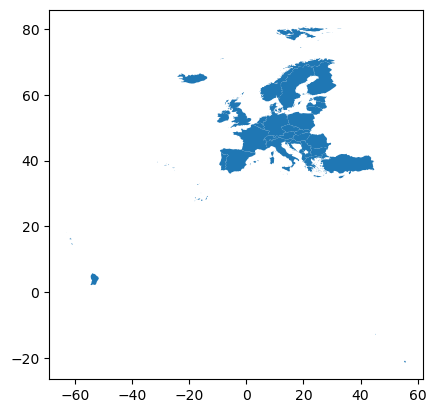

In [15]:
# we only take 'countries' (nuts_levl=0)
nuts0 = nuts.loc[nuts["LEVL_CODE"]==0]

nuts0.plot()

**Are you wondering why Europe is squeezed in the upper right corner?**

The NUTS data is official (and veeery correct) data from the EU statistical organisations. Of course it includes all territories that belong officially to the EU, including the oversees territories like for example French Guiana (fat bottom left dot). A nice example for the difference of POLYGONE and MULTIPOLYGONE. So Italy has also a multipolygone geometry, because to draw Sardinia and Sicily, you need seperat polygones. Multipolygone basically means more brackets in the geometry column. Claro?

We make this look better later. First let's continue with the _issues#2_ stuff:

.

## File Format .shp

You may have noticed when loading the NUTS data, the file **format is .shp (shape)**. This is a very common format for geo vector data (another would be .geojson).


The shape format was originally a proprietary format from ESRI, the 'Top Dog' the field. Part of their success was making that format common and so a sort of  standard.

A shape file comes in a bundle of at least(!) four files. Please have a **look in your data explorer** in our folder 

**//some_geo_data_shp**:

<img src="img/shapefile_components.png" alt="shapefile components" width="300" height="200">

Let me explain the four minimum parts of a shape-file:

- We talked about points, lines and polygones earlier, which are **geometrical shapes** and are stored in the -exactly- **.shp**

- But data contains usually further information (e.g. a line is a road or a river. Is it a Autobahn or a path?) 
  'Attributes' are stored in a **features database  .dbf**

- Then there is this **issue#2** thing about Coordinate Reference System CRS (..later). But the information about the **'projection'** is stored in **.prj**

- And the last of the _minimum four_ is **.shx** which is a **index** file, that holds the whole shape bundle together.

**Note!** You don't do much with the other files. You **only work with the .shp** and the others come along. Just don't delete anything ;)

.

.

.

# C) Rise and Shine

 How does all that look like in practice? Let's try it out!

 **A little exercise:**
- make cities.csv to GeoDataFrame
- plot the two layers
- beautify a map


## GeoDataFrame
using 
```gpd.points_from_xy(x, y)``` to make geometry out of latitude and longitude and <br>
```gpd.GeoDataFrame(df, geometry=geometry , crs="epsg:4326")``` to create the gdf.<br>
The crs parameter touches issue#2 (..later). For now (and in general if you don't know otherwise) take **crs="epsg:4326"** (or in online context sometimes "epsg:3857").

In [16]:
# our normal df with lat and lon values
cities.head(2)

,city,latitude,longitude,country,iso2,Bundesland,population
0,Berlin,52.5200,13.405,Germany,DE,Berlin,4473101.0
1,Stuttgart,48.7775,9.180,Germany,DE,Baden-Württemberg,2787724.0


In [17]:
# make gdf out of df with lat and lon values
cities_gdf = gpd.GeoDataFrame(cities, geometry=gpd.points_from_xy(cities.longitude, cities.latitude), crs="epsg:4326")
cities_gdf.head(2)

,city,latitude,longitude,country,iso2,Bundesland,population,geometry
0,Berlin,52.5200,13.405,Germany,DE,Berlin,4473101.0,POINT (13.40500 52.52000)
1,Stuttgart,48.7775,9.180,Germany,DE,Baden-Württemberg,2787724.0,POINT (9.18000 48.77750)


Now both our files are geodata. NUTS regions were from the start, and cities is now too. Geodata? Let's plot!

<Axes: >

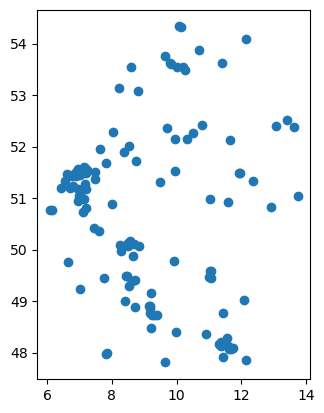

In [18]:
cities_gdf.plot()

Well, some german cities. Maybe you can make out the outline of Germany?

In [19]:
# when saving geodate, you need to use geo formats like .shp (or .geojson)
cities_gdf.to_file("some_cities_data.shp")

Please check what files you have created in your folder. Should be at least these four files (maybe more):

<img src="img/shapefile_cities_gdf.png" width="250" height="150">

.

.

## Print both Layers: NUTS and Cities

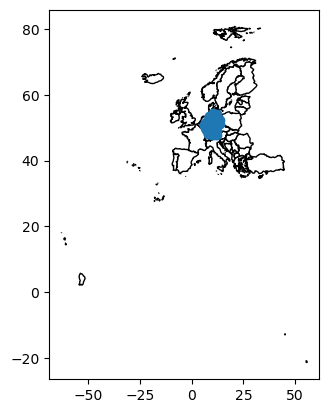

In [20]:
fig, ax = plt.subplots()
ax=nuts0.plot(ax=ax, color="white", edgecolor="black")
ax=cities_gdf.plot(ax=ax)
plt.show()



.

## Beautify Map

**1. map section (Kartenausschnitt)**

using ```.clip(left_border_longitude, bottom_border_latitude, right_border_longitude, top_border_latitude)```

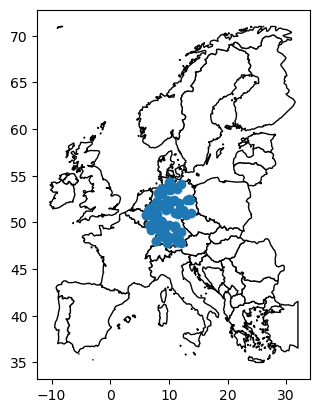

In [21]:
fig, ax = plt.subplots()
ax=nuts0.clip([-13, 35, 32, 71]).plot(ax=ax, color="white", edgecolor="black")
ax=cities_gdf.plot(ax=ax)
plt.show()

**2. colors and sizes**

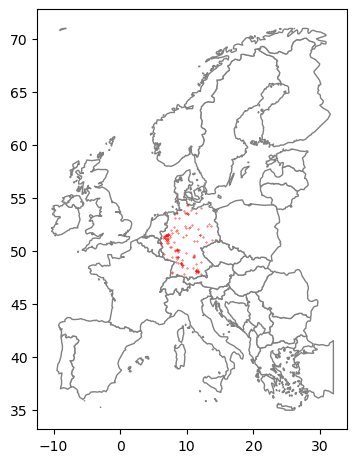

In [22]:
fig, ax = plt.subplots(figsize=(4, 6))
ax=nuts0.clip([-13, 35, 32, 71]).plot(ax=ax, color="white", edgecolor="grey")
ax=cities_gdf.plot(ax=ax, color="red", markersize=0.1)
plt.show()

**3. map layout**

You can do all sorts of layout with matplotlib like with every other graph. One very geographic like is to add a grid.

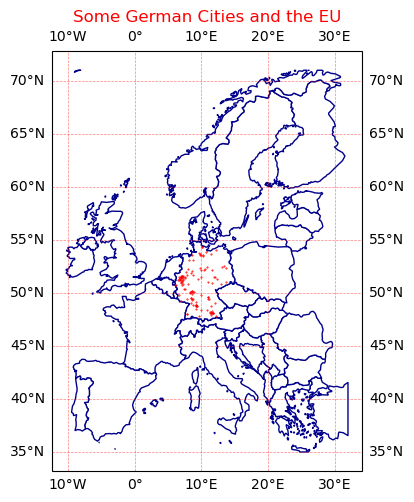

In [23]:
# pip install cartopy
import cartopy.crs as ccrs

fig, ax = plt.subplots(figsize=(4,6), subplot_kw={'projection': ccrs.PlateCarree()}) # <-
ax = nuts0.clip([-13, 35, 32, 71]).plot(ax=ax, color="white", edgecolor="darkblue")
ax = cities_gdf.plot(ax=ax, color="red", markersize=0.2)

ax.gridlines(draw_labels=True, linestyle='--', color='red', alpha=0.5, linewidth=0.5) # <-
plt.title("Some German Cities and the EU", color="red")
plt.show()

so far.